In [2]:
from knowknow import *
db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


# Writing authors

In [3]:
from IPython.display import display, Markdown

This section focuses on the authors writing and publishing the citations in my dataset. 
    These are the actors who define this dataset and give it meaning. 
    Writing authors are not counted relative to how often they cite, but instead as a population. 

# summary stats

In [4]:
cfa = db.by('fa').docs

loading variable sociology-wos-74b/doc ___ fa from disk


In [5]:
total_num = len(cfa)
num_lt_2 = sum(1 for k,c in cfa.items() if c < 2)
num_gte_2 = sum(1 for k,c in cfa.items() if c >= 2)

pct = sum(c for k,c in cfa.items() if c >= 2) / sum(c for k,c in cfa.items())

In [6]:
# sanity check. should be ~0.67
num_lt_2 / total_num

0.6162781356939736

In [7]:
display(Markdown("""
## ahh problems...

    I only include writing authors in this demographic analysis if they eventually publish at least twice in the dataset. 
    Note that this excludes almost 2/3 of writing authors ({num_lt_2:,} out of {total_num:,} distinct authors). 
    The {num_gte_2:,} authors that do publish at least twice are responsible for {pct:.0%} of the articles.
""".format(**locals())))


## ahh problems...

    I only include writing authors in this demographic analysis if they eventually publish at least twice in the dataset. 
    Note that this excludes almost 2/3 of writing authors (38,359 out of 62,243 distinct authors). 
    The 23,884 authors that do publish at least twice are responsible for 75% of the articles.


loading variable sociology-wos-74b/doc ___ fy from disk
loading variable sociology-wos-74b/doc ___ ffaage.fy from disk


Text(0.5, 1.0, 'percent of documents published by first-publishing-authors')

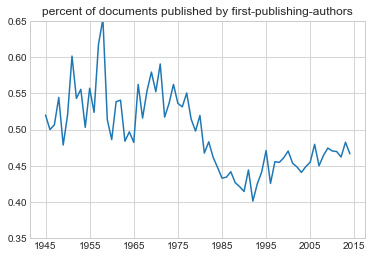

In [8]:
by_y_tot = np.array([ db(fy=YY).docs for YY in range(1945,2015) ])
by_y = np.array([ db(ffaage=0, fy=YY).docs for YY in range(1945,2015) ])

plt.plot(by_y/by_y_tot)
plt.ylim(0.35,0.65)
plt.xticks(range(0,len(by_y)+4,10),range(1945,2016,10));
plt.title( "percent of documents published by first-publishing-authors" )

# age distribution

**problem**
+ I have to exclude those citing authors who only publish once because they bring the mean down smhhh
+ Worse, there's no good way to do this with my paradigm.

loading variable sociology-wos-74b/ind ___ ffaAge.fy from disk


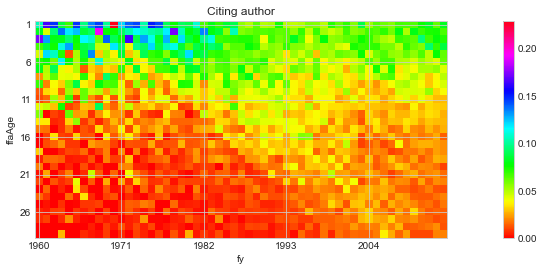

In [35]:
mat = viz.matrix(
    db, 'cits', 
    plot=True, trans=False,
    norm='fy',
    ffaAge=range(1,30), 
    fy=range(1960,2015)
)
plt.title('Citing author');

In [38]:
viz.matrix?

Signature: viz.matrix(db, typ='docs', plot=False, norm=None, trans=False, **kwargs)
Docstring: <no docstring>
File:      g:\my drive\2020 organisation\1. projects\qualitative analysis of literature\110 citation analysis\010 analyses\bundle 100 - knowknow reboot 10-2020\knowknow\viz.py
Type:      function


In [45]:
mat = viz.matrix(
    db, 'cits', trans=False,
    ffaAge=range(0,30), 
    fy=range(1960,2015)
)

In [44]:
mat[:,0]

array([213, 164, 349, 135,  91, 147, 163,  45, 139,  28,  23,  88, 115,
        72,  37,   0,   0,  64,  10,  39,   6,  23,   0,  31,   0,  11,
        13,   0,   0])

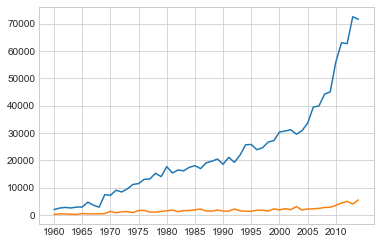

In [50]:
plt.plot(mat[0])
plt.plot(mat[1])
plt.xticks(
    range(0,55, 5),
    range(1960,2015, 5)
);

In [175]:
START_YEAR = 1930
END_YEAR = 2015

In [177]:
mat = viz.matrix(
    db, 'docs', 
    #plot=True, trans=False,
    ffaage=range(0,25), 
    fy=range(START_YEAR,END_YEAR),
    #norm='fy'
)

In [178]:
mat.T.sum(axis=1).shape

(85,)

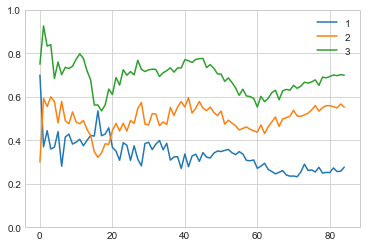

In [179]:
plt.plot( mat[1:10,:].sum(axis=0) / mat.sum(axis=0),label=1 )
plt.plot( mat[0,:] / mat.sum(axis=0),label=2 )

plt.plot( mat[0:5,:].sum(axis=0) / mat.sum(axis=0),label=3 )

plt.ylim(0,1)
plt.legend()

In [181]:
mat[0:5,1960-START_YEAR:1985-START_YEAR].sum() / mat[:,1960-START_YEAR:1985-START_YEAR].sum()

0.7196312039753338

In [182]:
#Figure 9 and Tables 3a-3d show a dramatic demographic shift in writing authors. 
#    From 1960 to 1985 about half of all work was published by those aged 0-5, and 1% or less by those 35-40 years of age. 

display(Markdown("""
""".format(**locals())))

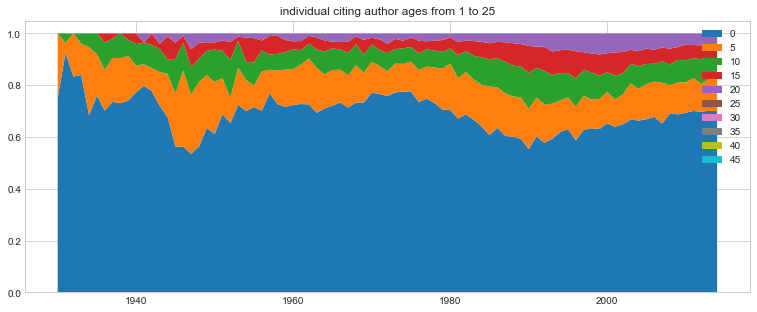

In [183]:
msum = mat[0:,:].sum(axis=0)
plt.figure(figsize=(13,5))
plt.stackplot(
    range(START_YEAR,END_YEAR),[
        mat[i:i+5,:].sum(axis=0) / msum
        for i in range(0,50,5)
    ], labels = range(0,50,5)
);
plt.legend();
plt.title('individual citing author ages from 1 to 25');

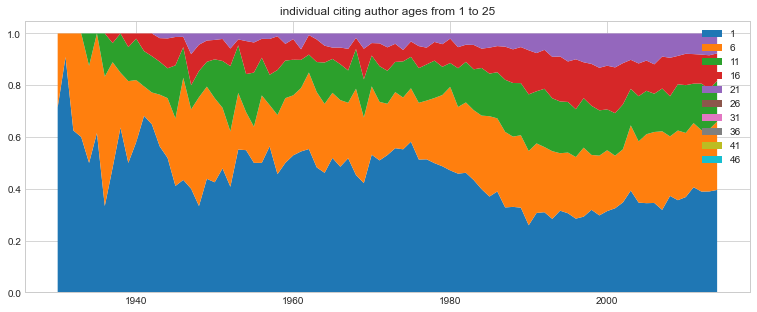

In [184]:
msum = mat[1:,:].sum(axis=0)
plt.figure(figsize=(13,5))
plt.stackplot(
    range(START_YEAR,END_YEAR),[
        mat[i:i+5,:].sum(axis=0) / msum
        for i in range(1,50,5)
    ], labels = range(1,50,5)
);
plt.legend();
plt.title('individual citing author ages from 1 to 25');

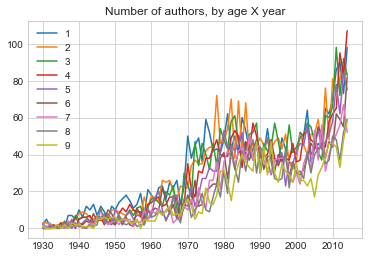

In [191]:
for i in range(1,10):
    plt.plot(mat[i], label=i)
plt.title("Number of authors, by age X year")
plt.xticks(range(0,END_YEAR-START_YEAR,10),range(START_YEAR,END_YEAR,10));
plt.legend()
#plt.ylim(0,750)

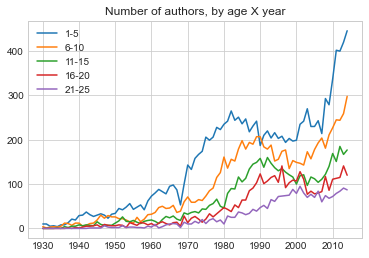

In [193]:
for i in range(1,25,5):
    plt.plot(mat[i:i+5,:].sum(axis=0), label='%s-%s'%(i,i+4))
plt.title("Number of authors, by age X year")
plt.xticks(range(0,END_YEAR-START_YEAR,10),range(START_YEAR,END_YEAR,10));
plt.legend()
#plt.ylim(0,750)

In [145]:
display(Markdown("""
Figure 2 shows clearly a “baby boom” of new authors, the most dramatic increase in new authors occurring 1965-1970.
    Over the next 20 years these authors grow older, but maintain productivity, and Figure 2 shows their incorporation into the 5-10 age group, the 10-15 age group, etc. 
    This 1960-1985 boom has in the next 20 years populated the older ranks of publishing sociologists in a manner not seen before. 
    Similar “baby booms” can be seen 1940-1945 and 1952-1956, although they are much smaller. 
    At the peaks of these booms, 
        in 1942 there were 26 publishing authors aged 0-5, 
        in 1956 there were 46 publishing authors aged 0-5, 
        and in 1983 there were 241 publishing authors aged 0-5.
""".format(**locals())))


Figure 2 shows clearly a “baby boom” of new authors starting as early as 1960 and peaking around 1985. 
    Over the next 20 years these authors grow older, but maintain productivity, and Figure 2 shows their incorporation into the 5-10 age group, the 10-15 age group, etc. 
    This 1960-1985 boom has in the next 20 years populated the older ranks of publishing sociologists in a manner not seen before. 
    Similar “baby booms” can be seen 1940-1945 and 1952-1956, although they are much smaller. 
    At the peaks of these booms, 
        in 1942 there were 26 publishing authors aged 0-5, 
        in 1956 there were 46 publishing authors aged 0-5, 
        and in 1983 there were 241 publishing authors aged 0-5.


In [194]:
display(Markdown("""
The probability that a writing author will die$_{{1}}$ in the next five years given it is still alive$_{{1}}$ 
    appears to be independent of when the author began publishing, 
    or how long the author has been publishing (See Figure 6), 
    hovering at about 15% for any given age/cohort combination. 
""".format(**locals())))


The probability that a writing author will die$_{1}$ in the next five years given it is still alive$_{1}$ 
    appears to be independent of when the author began publishing, 
    or how long the author has been publishing (See Figure 6), 
    hovering at about 15% for any given age/cohort combination. 
